## Plotting maps

This notebook is about plotting maps (and points on map) using different packages. I used this code a lot of times to build maps and I think can be helpful as an initial guide to the ones that are learning the basics. The examples here will use different packages:

- Folium: https://github.com/python-visualization/folium
- Plotting Shapefiles with Matplotlib and Geopandas: http://geopandas.org/mapping.html

All the code compiled in this notebook came from documentation examples and might have been changed a little bit to fit at my purposes in the plot.


In [27]:
from __future__ import print_function
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from geopy.geocoders import Nominatim
from shapely.geometry import Point

%matplotlib inline

### Example 1: Plotting points in a map with Folium

Code inspired in a workshop taught by https://github.com/polong-lin (IBM data science instructor)

Given addresses or latitude/longitude, Folium can plot points on a map in a beautiful manner, allowing the user to change the basemap. To this example, we are also going to transform an address into latitude and longitude point using Nominatim package.


In [2]:
# given addresses, let's get latitude and longitude of those
address_U1 = "960 Madison Avenue New York, NY"
address_U2 = "1060 Madison Avenue New York, NY"

# Geolocator translate addrss into lat, lon
geolocator = Nominatim()
location_U1 = geolocator.geocode(address_U1)
location_U2 = geolocator.geocode(address_U2)
latitude_U1, longitude_U1 = (location_U1.latitude, location_U1.longitude)
latitude_U2, longitude_U2 = (location_U2.latitude, location_U2.longitude)
print (latitude_U1, longitude_U1, latitude_U2, longitude_U2)

40.7739694 -73.9636632 40.777307375 -73.96153


In [3]:
# Create a map centered in a location chosen by the user (in this case 40.765937,-73.977304)
map_nyc = folium.Map(location=[40.7739694, -73.9636632], zoom_start=13)

# For every point to be plotted, add its location and if desired, a label can be shown if you click on the point
folium.CircleMarker([latitude_U1, longitude_U1], color = 'blue',
                    radius = 7, popup="John's House").add_to(map_nyc)
folium.CircleMarker([latitude_U2, longitude_U2], color = 'green',
                    radius = 7, popup="Jack's House").add_to(map_nyc)

map_nyc

<img src="Folium1.png">

- Adding marker to points;
- Creating for loop to create points instead of coding a line for each point;

Let's say that we want to plot a restaurants near a certain point, and show them with markers and when clicked show the name of the restaurant

In [4]:
# This dataset I got from Foursquare API. 
restaurants = pd.read_csv('Data/restaurants.csv')

In [5]:
restaurants.head()

,Unnamed: 0,name,url,categories,rating,id,isOpen,tier,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state
0,1,Kafana,http://www.kafananyc.com,b'Eastern European Restaurant',8.9,49e8896cf964a5204e651fe3,False,3,116 Avenue C,US,New York,United States,at E 8th St,312,"['116 Avenue C (at E 8th St)', 'New York, NY 1...","[{'lat': 40.72445009594483, 'lng': -73.9786382...",40.724450,-73.978638,10009.0,NY
1,11,Gruppo,http://www.gruppothincrust.com/,b'Pizza Place',8.8,3fd66200f964a5203ce51ee3,False,2,98 Avenue B,US,New York,United States,btwn 6th & 7th Sts,499,"['98 Avenue B (btwn 6th & 7th Sts)', 'New York...","[{'lat': 40.724949645619056, 'lng': -73.981332...",40.724950,-73.981333,10009.0,NY
2,12,Ciao For Now,http://ciaofornow.net/?page=home,b'Caf',8.6,3fd66200f964a5203fe51ee3,False,2,523 E 12th St,US,New York,United States,btwn Avenue B & Avenue A,491,"['523 E 12th St (btwn Avenue B & Avenue A)', '...","[{'lat': 40.728625692654504, 'lng': -73.980319...",40.728626,-73.980320,10009.0,NY
3,16,Eleven B,http://www.elevenbnyc.com,b'Italian Restaurant',6.5,4ae1b55df964a520df8621e3,False,2,174 Avenue B,US,New York,United States,11th Street,366,"['174 Avenue B (11th Street)', 'New York, NY 1...","[{'lat': 40.727518, 'lng': -73.979478, 'label'...",40.727518,-73.979478,10009.0,NY
4,29,Housewarmings!,NaN,b'Gastropub',NaN,515392c4e4b0f03a43c69fce,NaN,3,NaN,US,New York,United States,NaN,493,"['New York, NY', 'United States']","[{'lat': 40.72523709670373, 'lng': -73.9813471...",40.725237,-73.981347,NaN,NY


In [6]:
# Code inspired on material from IBM Workshop by Alex Aklson - https://www.linkedin.com/in/aklson/
venues_map = folium.Map(location=[40.724450, -73.978638], zoom_start=15) # generate map

# Creating restaurants on map
places = folium.map.FeatureGroup()
for lat, lng, in zip(restaurants.lat, restaurants.lng):
    places.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,
            color="blue",
            fill_color="blue",
            fill_opacity=0.6)
        )
venues_map.add_child(places)


# add labels to each point on the map
latitudes_list = list(restaurants.lat)
longitudes_list = list(restaurants.lng)
labels = list(restaurants.name)

for lat, lng, label in zip(latitudes_list, longitudes_list, labels):
    folium.Marker([lat, lng], popup=label).add_to(venues_map)

# display map
venues_map

<img src="Folium2.png">

### Example 2: Building a Choropleth map

This example is on how to plot a Choroplet using GeoPandas and Matplotlib.

The first part is about plotting a map from a shapefile, the second part is how to add other plots on the top of it and third how to add some information to the original shapefile and plot more meaningful maps.


In [8]:
# Loading NYC Census Tracts Shapefile
boroCT = gpd.read_file('Data/CT_Shape/ct_shape.shp')

In [9]:
# Visualizing boroCT as a pandas GeoDataFrame. The responsible to draw it as a map is the geometry column. 
boroCT.head(3)

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry
0,5000900,5,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016729,POLYGON ((-74.07920577013245 40.64343078374566...
1,5012500,5,Staten Island,I,012500,125,SI22,West New Brighton-New Brighton-St. George,3903,4.954936e+06,10582.855530,POLYGON ((-74.11618948747538 40.62894119691981...
2,5013301,5,Staten Island,E,013301,133.01,SI22,West New Brighton-New Brighton-St. George,3903,7.217847e+05,3428.312676,POLYGON ((-74.11719947139957 40.63456809812987...


Now let's plot the shapefile

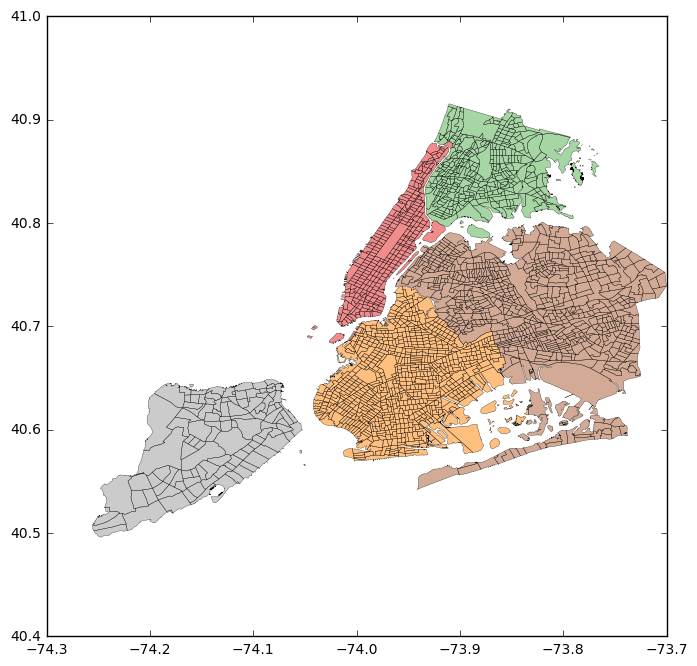

In [13]:
# Plotting the shapefile using the BoroCode as color
f, ax = plt.subplots(figsize=(8,8))
boroCT.plot(column = 'BoroCode', linewidth=0.2, ax = ax)

In most of cases the Shapefile just serve as a basemap, being fundamental to index the other features of the model. Let's take now a 311 complaint calls and plot on the top of the shapefile and see how it works.

Very often, the dataset you want to add to a map are not a GeoDataFrame and some transformations are required to plot. In the case of this example it will be easy because 311 complaint calls dataset contain Latitude and Longitude of the calls. So, to transform it into a GeoDataFrame it is just necessary to create the geometry feature based on latitude and longitude.

In [47]:
# Loading 311 Data. This data was filtered on the OpenData website and just contain information 
# about 09/15/201 to 09/17/2010 regarding to specific complaints on the topic "Damaged Tree" caused
# by a tornado in Queens and Brooklyn on 09/16/2010.

calls = pd.read_csv('Data/311_Service_Requests_from_2010_to_Present.csv')
calls = calls[calls['Complaint Type'] == 'Damaged Tree'] #Filter just damaged trees complaint

# This part is to clean undesired columns of the dataset, if you want to see how the whole dataset is
# comment this part
calls = calls[[u'Created Date', u'Closed Date', u'Agency',
       u'Agency Name', u'Complaint Type', u'Descriptor',
       u'Incident Zip', u'Incident Address',u'City',u'Facility Type', 
       u'Status',u'Due Date', u'Resolution Description',
       u'Borough', u'Latitude', u'Longitude']]

In [48]:
calls.head(3)

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Incident Zip,Incident Address,City,Facility Type,Status,Due Date,Resolution Description,Borough,Latitude,Longitude
1848,09/15/2010 07:09:16 AM,09/15/2010 03:53:51 PM,DPR,Department of Parks and Recreation,Damaged Tree,Branch or Limb Has Fallen Down,11373.0,NaN,ELMHURST,NaN,Closed,09/23/2010 07:39:30 AM,NaN,QUEENS,40.733418,-73.877720
1870,09/15/2010 07:26:56 AM,10/06/2010 10:19:28 AM,DPR,Department of Parks and Recreation,Damaged Tree,Branch or Limb Has Fallen Down,11385.0,18-74 MENAHAN STREET,RIDGEWOOD,NaN,Closed,10/31/2010 02:08:14 PM,The Department of Parks and Recreation has cor...,QUEENS,40.706010,-73.909163
1906,09/15/2010 07:46:53 AM,09/15/2010 10:11:10 AM,DPR,Department of Parks and Recreation,Damaged Tree,Branch or Limb Has Fallen Down,11385.0,18-74 MENAHAN STREET,RIDGEWOOD,NaN,Closed,09/23/2010 07:46:53 AM,NaN,QUEENS,40.706010,-73.909163


#### Transforming 311 Complaint Calls dataset into a GeoDataFrame

In [49]:
# Transforming 311 dataset into a GeoDataFrame
geometry = [Point(x) for x in zip(calls.Longitude, calls.Latitude)]

# Assign geometry as the geometry feature of the dataframe and configuring espg as 4326
# to learn more: https://en.wikipedia.org/wiki/World_Geodetic_System
crs = {'init': 'epsg:4326'}
calls_shp = gpd.GeoDataFrame(calls, crs=crs, geometry=geometry) 
calls_shp.head(3)

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Incident Zip,Incident Address,City,Facility Type,Status,Due Date,Resolution Description,Borough,Latitude,Longitude,geometry
1848,09/15/2010 07:09:16 AM,09/15/2010 03:53:51 PM,DPR,Department of Parks and Recreation,Damaged Tree,Branch or Limb Has Fallen Down,11373.0,NaN,ELMHURST,NaN,Closed,09/23/2010 07:39:30 AM,NaN,QUEENS,40.733418,-73.877720,POINT (-73.8777196143201 40.73341751681816)
1870,09/15/2010 07:26:56 AM,10/06/2010 10:19:28 AM,DPR,Department of Parks and Recreation,Damaged Tree,Branch or Limb Has Fallen Down,11385.0,18-74 MENAHAN STREET,RIDGEWOOD,NaN,Closed,10/31/2010 02:08:14 PM,The Department of Parks and Recreation has cor...,QUEENS,40.706010,-73.909163,POINT (-73.90916330103077 40.70600998542135)
1906,09/15/2010 07:46:53 AM,09/15/2010 10:11:10 AM,DPR,Department of Parks and Recreation,Damaged Tree,Branch or Limb Has Fallen Down,11385.0,18-74 MENAHAN STREET,RIDGEWOOD,NaN,Closed,09/23/2010 07:46:53 AM,NaN,QUEENS,40.706010,-73.909163,POINT (-73.90916330103077 40.70600998542135)


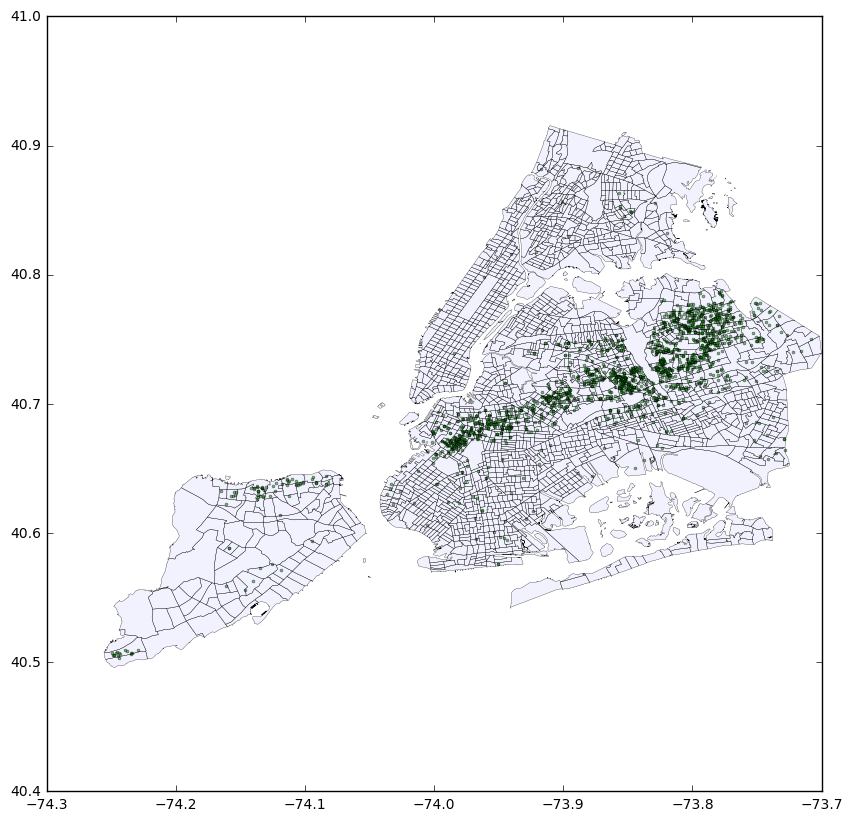

In [54]:
# Plotting the complaints and the basemap (NYC Shapelfile for Census Tracts 2010)
f, ax = plt.subplots(figsize=(10,10))
calls_shp.plot( markersize=2, color = 'Green', alpha = 0.5, ax = ax)
boroCT.plot(alpha=0.05, linewidth=0.2, facecolor = None, ax = ax)

#### Now let's say we want to count the complaints for each Census Tract in the map. To do so, we can use geometry.intersects to find it out for us. 

In [79]:
# This piece of code was inspired in professor Kashuk lecture 
# for NYU Class: Principle of Urban Informatics 

a=[] # create a list a and append the census tracts correspondent to the point of the 311 complaint
for i in range(len(calls_shp)):
    try:
        a.append(boroCT[boroCT.geometry.intersects \
                (calls_shp.iloc[i].geometry.centroid)].values[0][0])
    except IndexError:
        a.append(0) #append 0 if the complaint point don't intersect with any point of 
                    #the shapefile and return an error
calls['Census Tract'] = a

Now that we found the census tracts of each complaint, let's count the number for each CT


In [80]:
# Create a column of number of complaints for each census tracts and then 
# add a column with this information
countCT = dict(calls_shp['Census Tract'].value_counts().astype(int))
countCT[0] = 0 # 0 are errors, zero its counter just to avoid problems

In [81]:
# Now we copy the BoroCT2010 column and replace the values of this copy with the information
# on dictionary (that is the number of calls for each Census Tract)
boroCT['countCT'] = boroCT['BoroCT2010']
boroCT['countCT'].replace(countCT, inplace=True)

In [82]:
# Notice that the census tracts that don't contain any complaints were not replaced by the code,
# so, for the ones that remain not altered we change it's value to zero
b = []
for i in range(0, len(boroCT['countCT'])):
    if type(boroCT['countCT'][i]) == unicode:
        b.append(0)
    else:
        b.append(boroCT['countCT'][i])
boroCT['countCT'] = b

In [83]:
boroCT.head(3)

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry,countCT
0,5000900,5,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016729,POLYGON ((-74.07920577013245 40.64343078374566...,0
1,5012500,5,Staten Island,I,012500,125,SI22,West New Brighton-New Brighton-St. George,3903,4.954936e+06,10582.855530,POLYGON ((-74.11618948747538 40.62894119691981...,0
2,5013301,5,Staten Island,E,013301,133.01,SI22,West New Brighton-New Brighton-St. George,3903,7.217847e+05,3428.312676,POLYGON ((-74.11719947139957 40.63456809812987...,0


#### Now let's plot and see

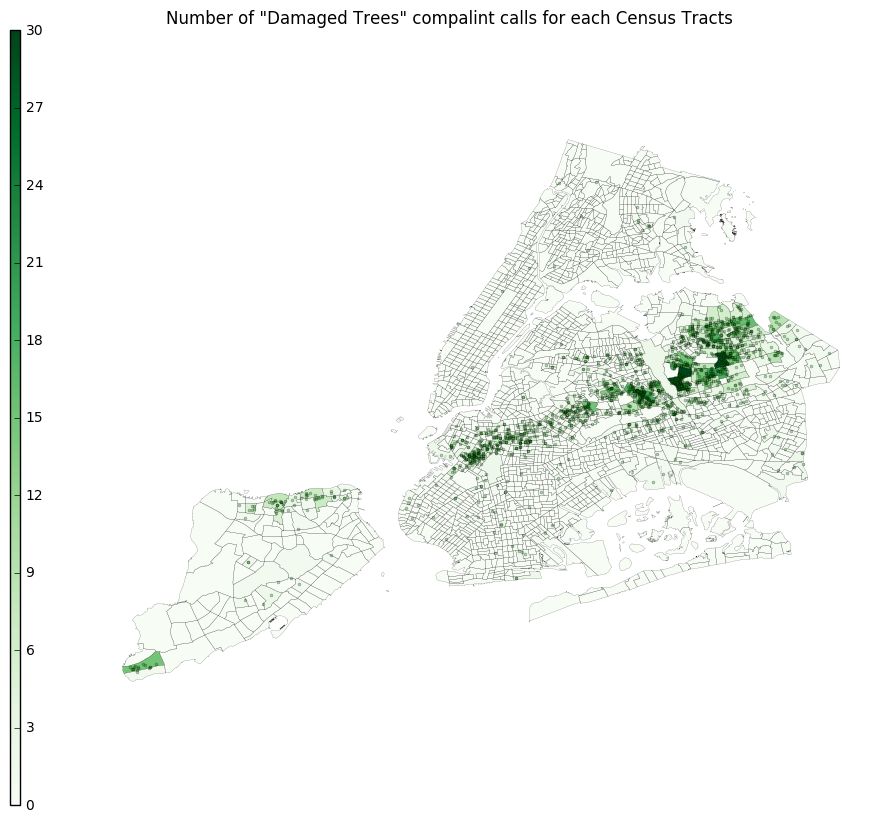

In [108]:
f, ax = plt.subplots(figsize=(10,10))
calls_shp.plot(markersize=2, color = 'Green', alpha = 0.3, ax = ax)
boroCT.plot(column = 'countCT', alpha = 1.0, cmap = 'Greens',
                vmin=0.0, vmax=30.0, linewidth=0.1,
                ax = ax)

plt.axis('off')
plt.title('Number of "Damaged Trees" compalint calls for each Census Tracts ')

# Add Colorbar
fig = ax.get_figure()
cax = fig.add_axes([0.07, 0.125, 0.01, 0.775])
sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=0, vmax=30))
sm._A = []
fig.colorbar(sm, cax=cax)